In [26]:
import pandas as pd
import plotly_express as px

In [87]:
df = pd.read_csv('contango_runs_usd.csv', index_col=0, header=[0,1,2])
df

2024-04-12_2024-01-13_[10]_3_10d_10d_0.05_0.25_0.0005_10_10000.0  \
                                                                                   weights   
                                                       Ethereum_morpho-blue_USDE-DAI_91.5%   
2024-01-13 00:00:00+00:00                                           0.000000                 
2024-01-14 00:00:00+00:00                                           0.000000                 
2024-01-15 00:00:00+00:00                                           0.000000                 
2024-01-16 00:00:00+00:00                                           0.000000                 
2024-01-17 00:00:00+00:00                                           0.000000                 
...                                                                      ...                 
2024-04-08 00:00:00+00:00                                        2524.221465                 
2024-04-09 00:00:00+00:00                                        2526.101979                 
2024-04-10 00:00:00+00:00                                        2531.794781                 
2024-04-11 00:00:00+00:00                                        2535.950708                 
2024-04-12 00:00:00+00:00                                        2539.933848                 

                                                                             \
                                                                   pred_apy   
                                  total Ethereum_morpho-blue_USDE-DAI_91.5%   
2024-01-13 00:00:00+00:00  10000.000000                            0.000000   
2024-01-14 00:00:00+00:00  10000.000000                            0.000000   
2024-01-15 00:00:00+00:00  10000.000000                            0.000000   
2024-01-16 00:00:00+00:00  10000.000000                            0.000000   
2024-01-17 00:00:00+00:00  10000.000000                            0.000000   
...                                 ...                                 ...   
2024-04-08 00:00:00+00:00   7488.750964                            0.395312   
2024-04-09 00:00:00+00:00   7488.750964                            0.423865   
2024-04-10 00:00:00+00:00   7488.750964                            0.435573   
2024-04-11 00:00:00+00:00   7488.750964                            0.444768   
2024-04-12 00:00:00+00:00   7488.750964                            0.447032   

                                                                         \
                                                                    apy   
                              total Ethereum_morpho-blue_USDE-DAI_91.5%   
2024-01-13 00:00:00+00:00  0.000000                            0.000000   
2024-01-14 00:00:00+00:00  0.000000                            0.000000   
2024-01-15 00:00:00+00:00  0.000000                            0.000000   
2024-01-16 00:00:00+00:00  0.000000                            0.000000   
2024-01-17 00:00:00+00:00  0.000000                            0.000000   
...                             ...                                 ...   
2024-04-08 00:00:00+00:00  0.395312                            0.271834   
2024-04-09 00:00:00+00:00  0.423865                            0.821688   
2024-04-10 00:00:00+00:00  0.435573                            0.598692   
2024-04-11 00:00:00+00:00  0.444768                            0.572880   
2024-04-12 00:00:00+00:00  0.447032                            0.478574   

                                                                               \
                                                              apyReward         
                              total Ethereum_morpho-blue_USDE-DAI_91.5% total   
2024-01-13 00:00:00+00:00  0.000000                                   0     0   
2024-01-14 00:00:00+00:00  0.000000                                   0     0   
2024-01-15 00:00:00+00:00  0.000000                                   0     0   
2024-01-16 00:00:00+00:00  0.000000                              

In [94]:
keys = ['backtest.end_date', 'backtest.start_date', 'label_map.apy.horizons', 'run_parameters.models.apy.TrivialEwmPredictor.params.cap', 'run_parameters.models.apy.TrivialEwmPredictor.params.halflife', 'run_parameters.models.apy.TrivialEwmPredictor.params.horizon', 'strategy.base_buffer', 'strategy.concentration_limit', 'strategy.cost', 'strategy.gas', 'strategy.initial_wealth']
scatters = {}
for run_name in df.columns.get_level_values(0).unique():
    params = dict(zip(keys, run_name.split('_')))
    horizons =eval(params['label_map.apy.horizons'])[0]
    halflife = params['run_parameters.models.apy.TrivialEwmPredictor.params.halflife']
    horizon = params['run_parameters.models.apy.TrivialEwmPredictor.params.horizon']
    df_param = df.xs(run_name, level=0, axis=1)
    apy = df_param.xs('apy', level=0, axis=1).drop(columns=['total'])
    fwd_apy = apy.rolling(window=horizons).mean().shift(0)
    pred_apy = df_param.xs('pred_apy', level=0, axis=1).drop(columns=['total'])
    scatters[(halflife,horizon)] = pd.concat({'apy': apy, 'pred_apy': pred_apy, 'fwd_apy': fwd_apy}, axis=1).stack()

In [102]:
df

,x,y
0,1.534310,1.622220
1,0.752980,0.673326
2,1.464227,1.427593
3,1.803255,0.276742
4,1.104542,0.917095
...,...,...
95,0.748295,1.112623
96,1.478267,1.777779
97,1.026207,1.733273
98,1.310729,1.146508


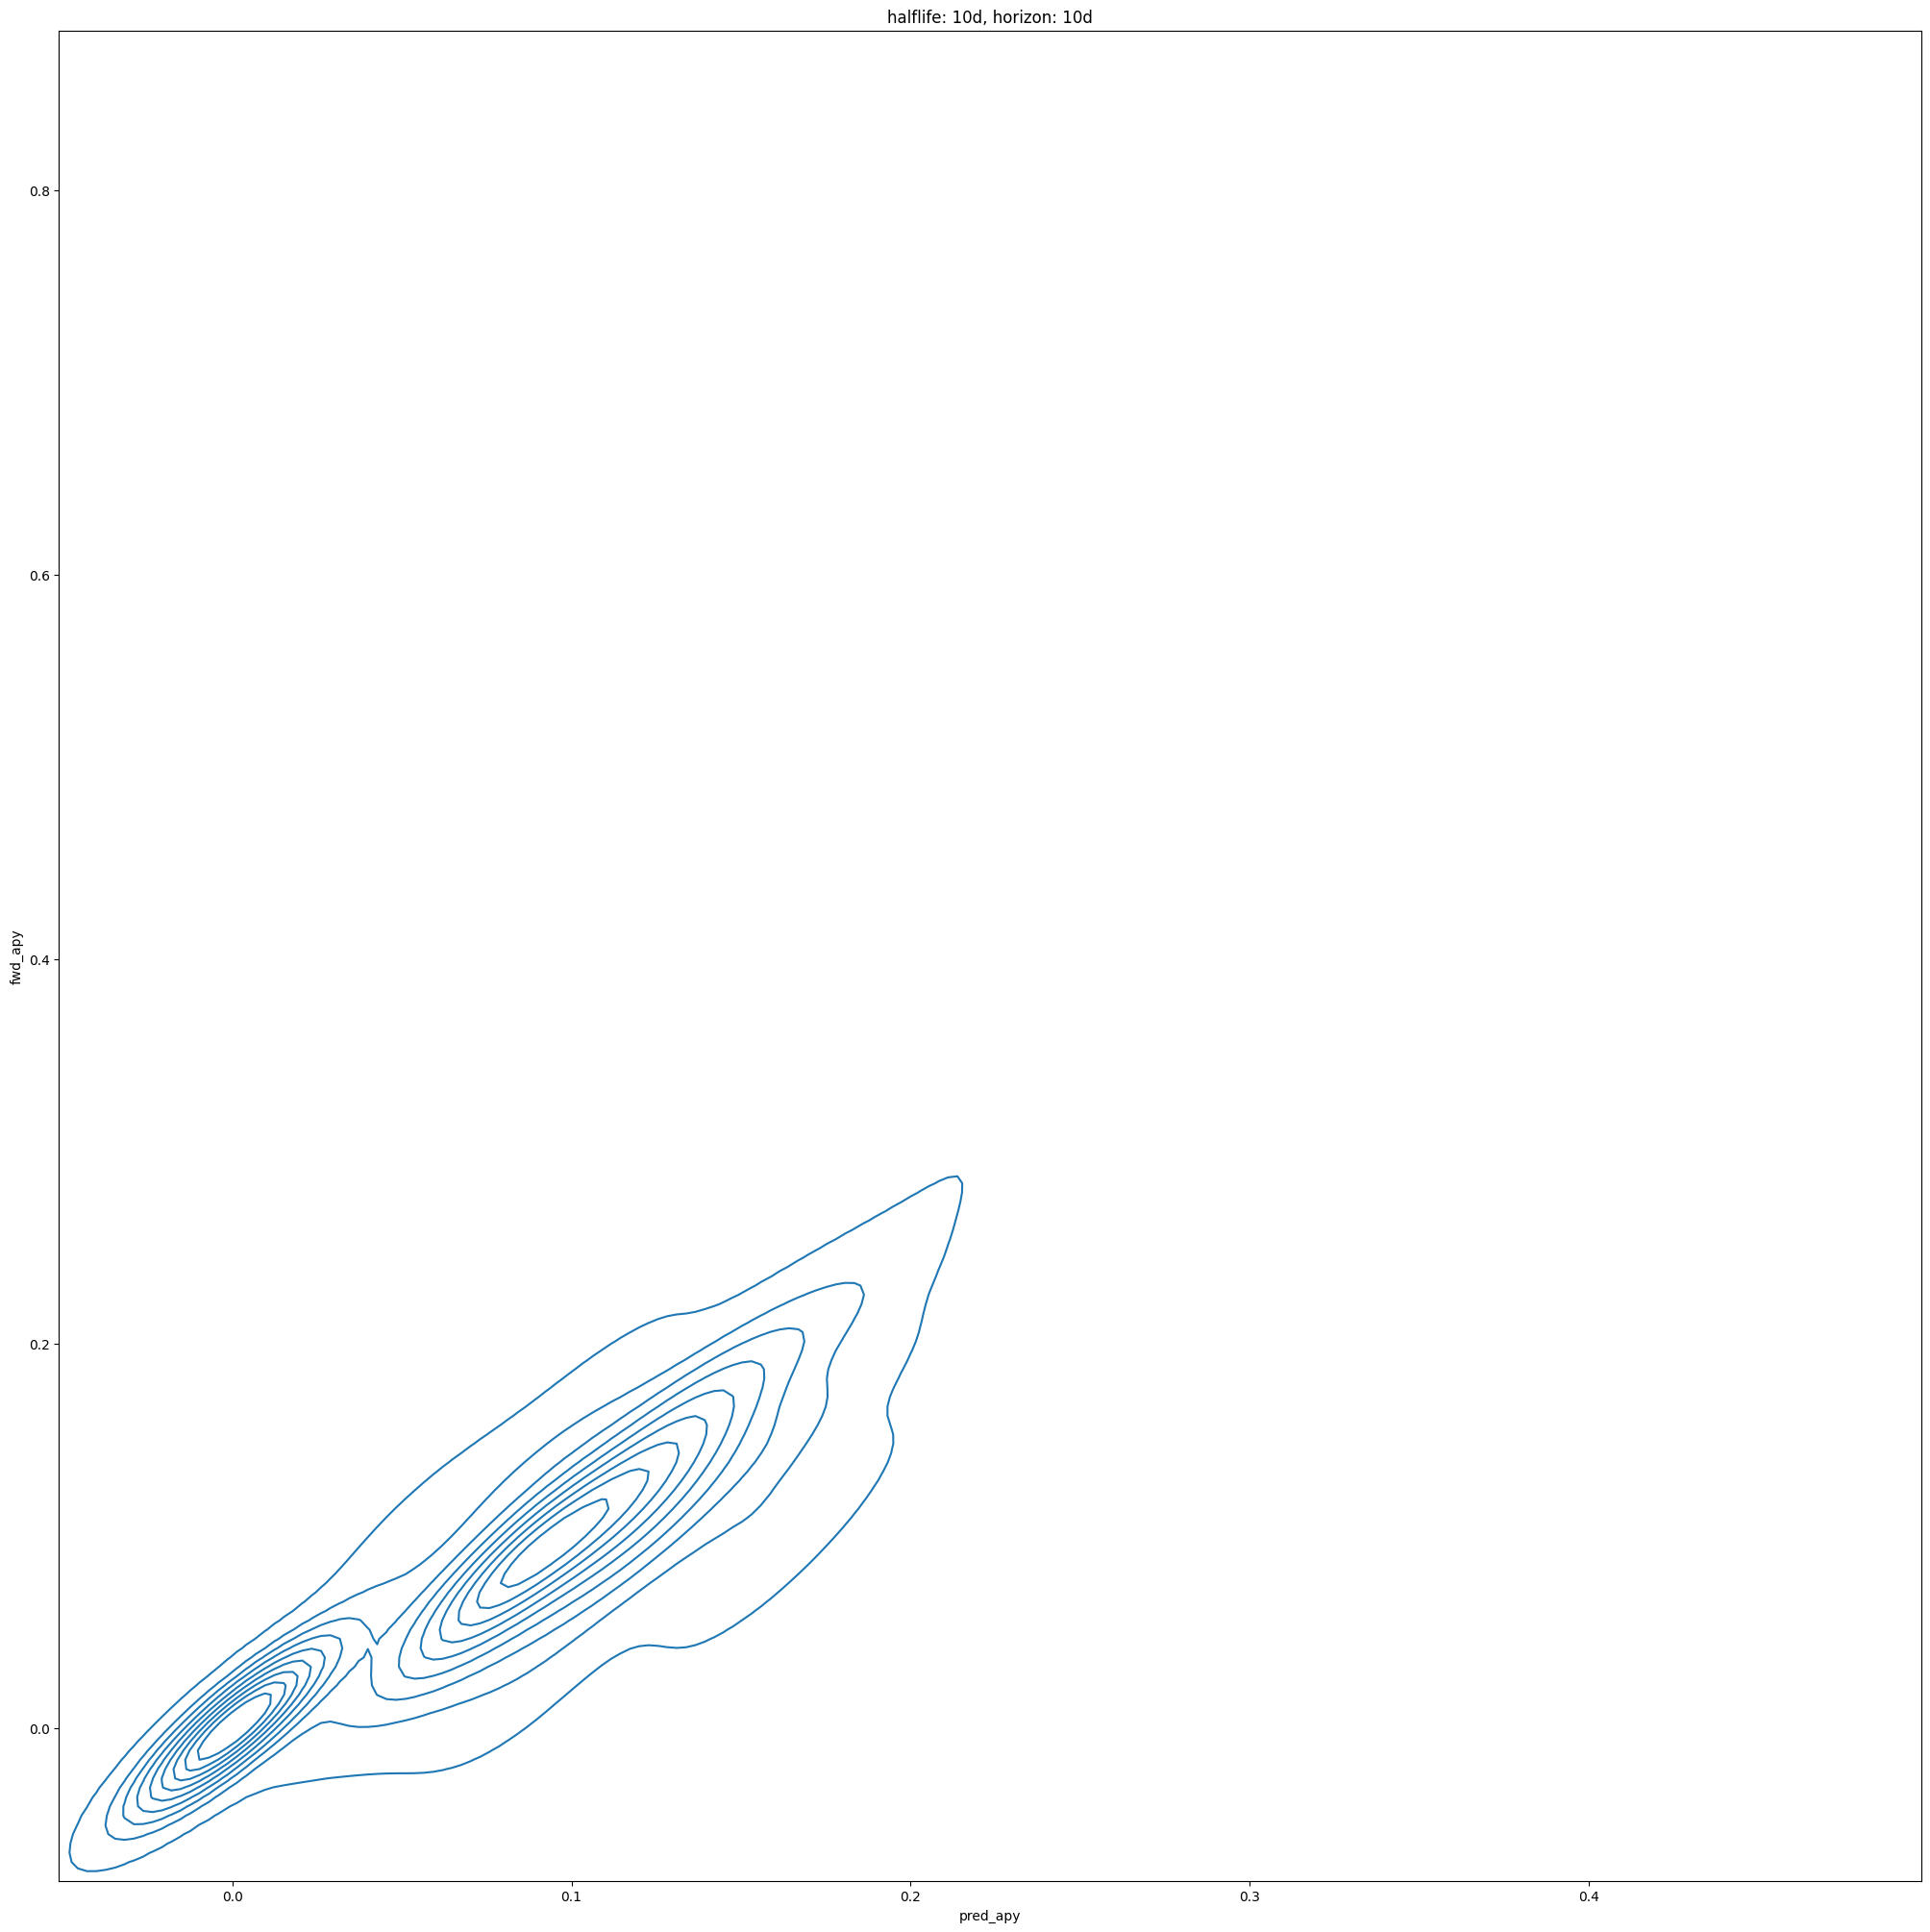

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

rows, cols = list(set(key[0] for key in scatters.keys())), list(set(key[1] for key in scatters.keys()))
nrows=len(rows)
ncols=len(cols)

# Create a figure and axis objects for the matrix of density plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25), squeeze=False)

# Iterate through the dictionary and plot each density plot in the correct position
for i, (key, df) in enumerate(scatters.items()):
    row = (i // ncols)
    col = (i % ncols)
    sns.kdeplot(data=df, x='pred_apy', y='fwd_apy', ax=axs[row, col])
    axs[row, col].set_title(f'halflife: {key[0]}, horizon: {key[1]}')

# Remove any empty plots
for ax in axs.flat:
    ax.set_visible(False)
for i, (key, df) in enumerate(scatters.items()):
    row = (i // ncols)
    col = (i % ncols)
    axs[row, col].set_visible(True)

plt.show()

In [50]:
px.line(apy.rolling(window=10).mean().shift(-10))